In [1]:
# Loading stuff
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
pd.set_option('max_columns', 1000)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the data
df_train = pd.read_csv('/Users/vzogh/APMAE4990-/data/AmesHousingblanksremoved.csv')

In [3]:
# Explore the columns
print(df_train.columns.values)
print('No. variables:', len(df_train.columns.values))

['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
 'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
 'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
 'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating' 'Heating QC'
 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF' 'Gr Liv Area'
 'Bsmt Full Bath' 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr'
 'Kitchen Qual' 'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu'
 'Garage Type' 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area'
 'Garage Qual' 'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
 'Enclosed Porch' 'Screen Porch' 'Fence' 'Misc Feature' 'Misc Val'
 'Mo Sold' 'Yr Sol

In [4]:
num_missing = df_train.isnull().sum()
percent = num_missing / df_train.isnull().count()

df_missing = pd.concat([num_missing, percent], axis=1, keys=['MissingValues', 'Fraction'])
df_missing = df_missing.sort_values('Fraction', ascending=False)
df_missing[df_missing['MissingValues'] > 0]

,MissingValues,Fraction
Misc Feature,2358,0.966393
Alley,2255,0.924180
Fence,1969,0.806967
Fireplace Qu,1244,0.509836
Garage Qual,148,0.060656
Garage Cond,148,0.060656
Garage Finish,148,0.060656
Garage Yr Blt,148,0.060656
Garage Type,146,0.059836
Bsmt Exposure,69,0.028279


In [5]:
variables_to_keep = df_missing[df_missing['MissingValues'] == 0].index
df_train = df_train[variables_to_keep]

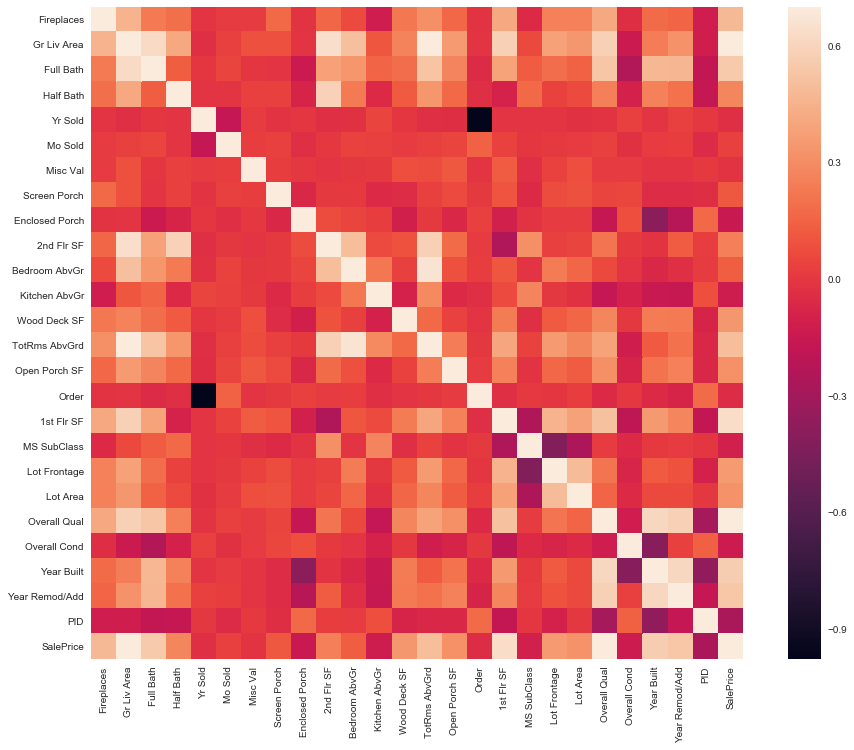

In [6]:
# Build the correlation matrix
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.7, square=True)

In [7]:
interesting_variables = matrix['SalePrice'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.6]
interesting_variables = interesting_variables[interesting_variables.index != 'SalePrice']
interesting_variables

Overall Qual    0.807591
Gr Liv Area     0.706110
1st Flr SF      0.638934
Name: SalePrice, dtype: float64

In [8]:
values = np.sort(df_train['Overall Qual'].unique())
print('Unique values of "Overall Qual":', values)

Unique values of "Overall Qual": [ 1  2  3  4  5  6  7  8  9 10]


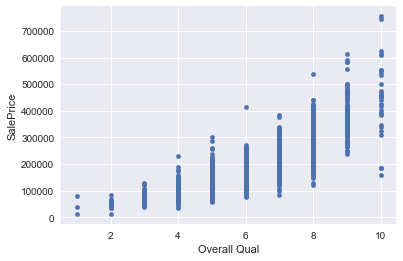

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['Overall Qual']], axis=1)
data.plot.scatter(x='Overall Qual', y='SalePrice')

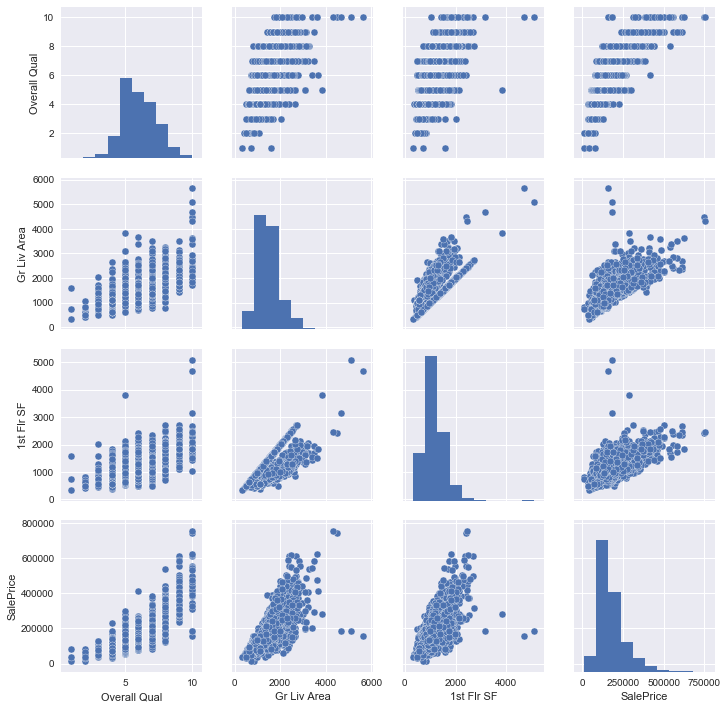

In [10]:
cols = interesting_variables.index.values.tolist() + ['SalePrice']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

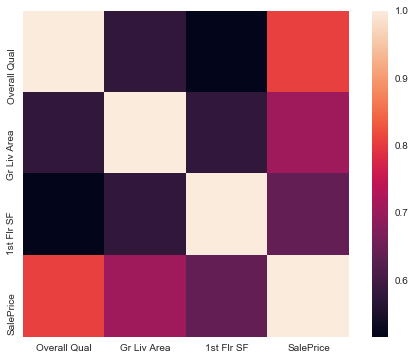

In [11]:
# Build the correlation matrix
matrix = df_train[cols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, vmax=1.0, square=True)

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

pred_vars = [v for v in interesting_variables.index.values if v != 'SalePrice']
target_var = 'SalePrice'

X = df_train[pred_vars]
y = df_train[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=10, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

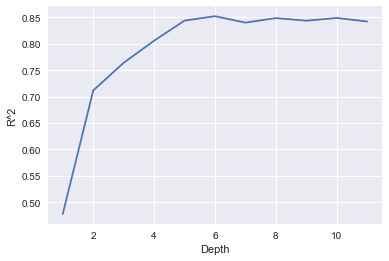

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,12)
for n in depths:
    regr = RandomForestRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
    
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
plt.show()
test_errors=scores
n_opt=depths[np.argmax(scores)]

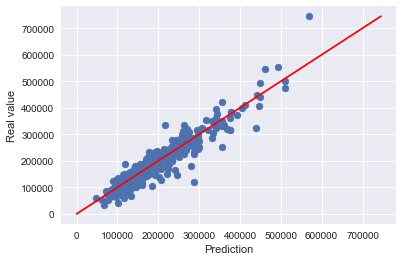

In [113]:
y_pred = model.predict(X_test)

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MAE:	$19472.13
MSLE:	0.02727


In [115]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean square error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
#R^2 score
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 792726275.10
R^2 score: 0.89
